<style>
  .fancy-background {
    padding: 30px; /* Padding around the content */
    color: white; /* Text color */
    text-align: center; /* Centering text */
    background-image: url('data:image/svg+xml;utf8,<svg xmlns="http://www.w3.org/2000/svg" width="100%" height="100%" preserveAspectRatio="none"><rect x="50" y="50" width="200" height="200" fill="%23ffffff" style="border-radius: 10px;"/></svg>'); /* SVG background image */
    background-size: cover; /* Cover the entire area of the block */
    background-repeat: no-repeat;
    background-position: center center;
  `
</style>

<div class="fancy-background">
  <center><h1 style="color:#00A3E0;">The Graduate Journey: </h1>
  <center><h2 style="color:#00A3E0;"> Education and Labour Market Realities in Canada</h2>

  <center><h3 style="color:#005587;">Fuxi Ma, PhD</h3>
  <hr style="border: 1px solid #00A3E0;">
</div>

## National Graduates Survey- class of 2020 (Data collected in 2023)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from IPython.display import display, Markdown

# Read the CSV file
try:
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv('ngs2020.csv')
    
    # Display basic information about the dataset
    display(Markdown("<span style='color: green'>Dataset information:</span>"))
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}\n")
    df.info()
    print("\n")
    display(Markdown("<span style='color: green'>Column names:</span>"))
    print(" ".join(list(df.columns)),"\n")
    
    # Number of missing data
    missing_data = df.isnull().sum().sum()
    if missing_data == 0:
        print(f"\033[30;43mThere are no missing data.\033[0m")
    else:
        print(f"\033[30;43mThere are {missing_data} missing data.\033[0m")
    
except FileNotFoundError:
    print("Error: The file 'ngs2020.csv' was not found in the current directory.")
except pd.errors.EmptyDataError:
    print("Error: The file 'ngs2020.csv' is empty.")
except pd.errors.ParserError:
    print("Error: There was an issue parsing the CSV file. Check if it's properly formatted.")

<span style='color: green'>Dataset information:</span>

Number of rows: 16138
Number of columns: 114

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16138 entries, 0 to 16137
Columns: 114 entries, PUMFID to DDIS_FL
dtypes: int64(114)
memory usage: 14.0 MB




<span style='color: green'>Column names:</span>

PUMFID CERTLEVP REG_INST REG_RESP PGMCIPAP PGM_P034 PGM_P036 PGM_P100 PGM_P111 PGM_280A PGM_280B PGM_280C PGM_280D PGM_280E PGM_280F PGM_290 PGM_350 PGM_380 PGM_P401 PGM_410 PGM_415 PGM_430 COV_010 COV_070 COV_080 EDU_010 EDU_P020 HLOSINTP STL_010 STL_020 STULOANS STL_030 OWESLGD OWEGVIN STL_080 STL_100A STL_100B STL_100C STL_100D STL_130 STL_150 STL_160B STL_160C STL_160D STL_160E STL_160F STL_160G STL_160H STL_160I STL_160J STL_160L STLP160N SRCFUND STL_170A STL_170B STL_170C STL_170D STL_170E STL_170F STL_170G STL_170H STL_170I STL_170J STL_170L STLP170N RESPP STL_190 DBTOTGRD DBTALGRD DBTOTINT DBTALINT SCHOLARP LMA_010 LFSTATP LMA2_07 LMA3_P01 LFCINDP LFCOCCP LFWFTPTP LMA6_05 LMA6_08 JOBQLEVP JOBQLGRD JOBQLINT LMA6_11 LMA6_12 LMA6_13A LMA6_13B LMA6_13C JOBINCP LMA6_15 AFT_P010 AFT_P020 AFT_P040 AFT_050 AFT_070 AFT_080 AFT_090 BEF_P140 BEF_160 PREVLEVP HLOSGRDP PAR1GRD PAR1INT PAR2GRD PAR2INT GRADAGEP GENDER2 MS_P01 MS_P02 CTZSHIPP VISBMINP PERSINCP DDIS_FL 

There are no missing da

## NGS Questions

In [2]:
import yaml

# Path to the YAML file
file_path = 'ngs2020_questions.yaml'

try:
    # Open and load the YAML file
    with open(file_path, 'r') as file:
        questions = yaml.safe_load(file)
    
    # Print the loaded question structure

    print(f'\033[32m\nPUMFID: \033[0m Public Use Microdata File ID - {questions["PUMFID"]}\n')
    print(f"Questions ({len(questions)-1}):\n")
    for question in questions:
        if question != 'PUMFID':
            print(f'\033[32m{question}: \033[0m {questions[question]}')
        
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except yaml.YAMLError as e:
    print(f"Error parsing YAML file: {e}")


PUMFID:  Public Use Microdata File ID - Randomly generated record identifier for the PUMF file

Questions (113):

CERTLEVP:  2020 Program - Level of study - Grouping
REG_INST:  2020 Program - Region of postsecondary educational institution
REG_RESP:  Time of interview 2023 - Region of primary residence
PGMCIPAP:  2020 Program - Aggregated CIP 2021
PGM_P034:  2020 Program - Full-time or part-time student
PGM_P036:  2020 Program - Reason did not take program full-time
PGM_P100:  Work placement during program
PGM_P111:  Work placement during prog - Description
PGM_280A:  Entrepreneurial skills - Started a business
PGM_280B:  Entrepreneurial skills - Completed courses
PGM_280C:  Entrepreneurial skills - Business plan or pitch competition
PGM_280D:  Entrepreneurial skills - Visited an entrepreneurship centre
PGM_280E:  Entrepreneurial skills - Worked on an entrepreneurship project
PGM_280F:  Entrepreneurial skills - None of the above
PGM_290:  2020 Program - Worked during program
PGM_350: 

## NGS Responses

In [3]:
# Import the yaml module
from IPython.display import display, Markdown
import yaml
import os

# Check if the file exists before attempting to load it
file_path = "ngs2020_responses.yaml"

if os.path.exists(file_path):
    # Open and load the YAML file
    with open(file_path, 'r') as file:
        try:
            # Load the YAML content into a Python object (typically a dictionary)
            responses = yaml.safe_load(file)
            
            # Print the first few items to verify the responses loaded correctly
            display(Markdown(f"<span style='color: green'>Response code defination ({len(responses)}):</span>"))
            for response in responses:
                print(f'\033[32m{response}:\033[0m')
                for code in responses[response]:
                    print(f'  \033[32m{code}: \033[0m{responses[response][code]}')
                
        except yaml.YAMLError as e:
            print(f"Error parsing YAML file: {e}")
else:
    print(f"File not found: {file_path}")
    print("Please make sure the file exists in the current working directory.")
    print(f"Current working directory: {os.getcwd()}")

<span style='color: green'>Response code defination (113):</span>

AFT_050:
  1: Full time
  2: Part time
  6: Valid skip
  7: Don't know
  8: Refusal
  9: Not stated
AFT_070:
  1: Permanent
  2: Not permanent
  6: Valid skip
  7: Don't know
  8: Refusal
  9: Not stated
AFT_080:
  1: Seasonal job
  2: Temporary, term or contract job
  3: Casual job
  4: Other
  6: Valid skip
  7: Don't know
  8: Refusal
  9: Not stated
AFT_090:
  1: Closely related
  2: Somewhat related
  3: Not at all related
  6: Valid skip
  7: Don't know
  8: Refusal
  9: Not stated
LMA6_11:
  1: Closely related
  2: Somewhat related
  3: Not at all related
  6: Valid skip
  7: Don't know
  8: Refusal
  9: Not stated
AFT_P010:
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4 or more
  6: Valid skip
  7: Don't know
  8: Refusal
  9: Not stated
AFT_P020:
  1: Already working at a job or business
  2: Less than 6 months
  3: 6 months to less than 12 months
  4: 1 year or more
  6: Valid skip
  7: Don't know
  8: Refusal
  9: Not stated
AFT_P040:
  1: Employee
  2: Self-employed / Working in a fami

### Extract All NGS Tables to Excel

In [4]:
#%run Extract_All_NGS_Tables_to_Excel.ipynb

In [5]:
# Get NGS table

def get_NGS_table(table_name = 'AFT_050', excel_file="NGS_Tables.xlsx"):
    try:
        # Read the Excel sheet into a DataFrame, using first row as headers
        df = pd.read_excel(excel_file, 
                          sheet_name=table_name, 
                          header=0)  # header=0 is default but making it explicit
        print(f"\n'\033[32m{table_name}\033[0m': {questions[table_name]}\n")
        df
        return df
    except Exception as e:
        print(f"Error loading table {table_name}: {e}")
        return None

### Distribution of Personal Income in 2022


'PERSINCP': Total personal income in 2022



C:\Users\Fuxim\AppData\Local\Temp\ipykernel_13168\1503766661.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


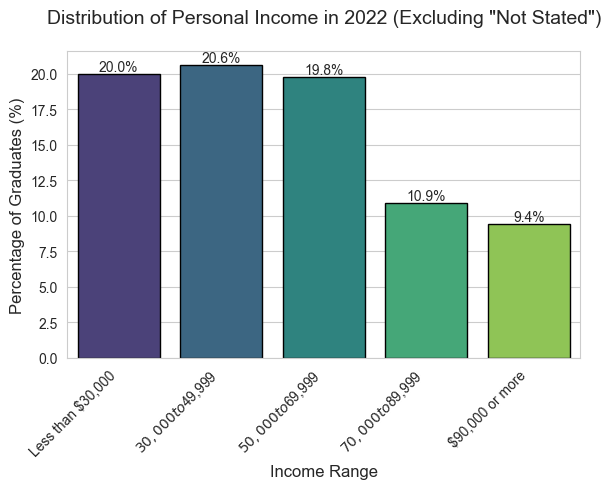


Key Statistics:
Total respondents (excluding 'Not stated'): 13,130
Median income category: $50,000 to $69,999
Highest proportion category: $30,000 to $49,999 (20.6%)


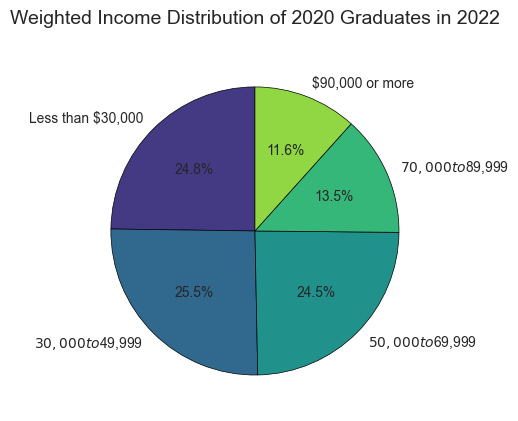

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# First let's clean up the column names and data if needed
df = get_NGS_table("PERSINCP")
df.columns = ['Answer Categories', 'Code', 'Frequency', 'Weighted Frequency', '%']

# Clean any whitespace or formatting issues in the numeric columns
df['Frequency'] = df['Frequency'].astype(str).str.replace(',', '').astype(int)
df['Weighted Frequency'] = df['Weighted Frequency'].astype(str).str.replace(',', '').astype(int)
df['%'] = df['%'].astype(float)

# Fix the income range labels by combining with the previous row's dollar sign
for i in range(1, 4):
    if not df.loc[i, 'Answer Categories'].startswith('$'):
        df.loc[i, 'Answer Categories'] = '$' + df.loc[i, 'Answer Categories']

# Remove 'Not stated' for clearer analysis of income distribution
df_income = df[df['Code'] != 99].copy()

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(6, 5))

# Create bar plot - using '%' column for y-axis
ax = sns.barplot(
    x='Answer Categories', 
    y='%', 
    data=df_income,
    palette="viridis",
    edgecolor='black'
)

# Customize plot
plt.title('Distribution of Personal Income in 2022 (Excluding "Not Stated")', fontsize=14, pad=20)
plt.xlabel('Income Range', fontsize=12)
plt.ylabel('Percentage of Graduates (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 5), 
        textcoords='offset points',
        fontsize=10
    )

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Additional analysis
print("\nKey Statistics:")
print(f"Total respondents (excluding 'Not stated'): {df_income['Frequency'].sum():,}")
median_category = df_income[df_income['%'].cumsum() >= 50].iloc[0]['Answer Categories']
print(f"Median income category: {median_category}")
print(f"Highest proportion category: {df_income.loc[df_income['%'].idxmax(), 'Answer Categories']} ({df_income['%'].max():.1f}%)")

# Create a pie chart for another visualization
plt.figure(figsize=(5, 5))
plt.pie(
    df_income['%'],
    labels=df_income['Answer Categories'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("viridis", len(df_income)),
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
    textprops={'fontsize': 10}
)
plt.title('Weighted Income Distribution of 2020 Graduates in 2022', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

### Age Distribution at Graduation



'GRADAGEP': 2020 Program - Age at time of graduation - Grouping



C:\Users\Fuxim\AppData\Local\Temp\ipykernel_13168\432788408.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


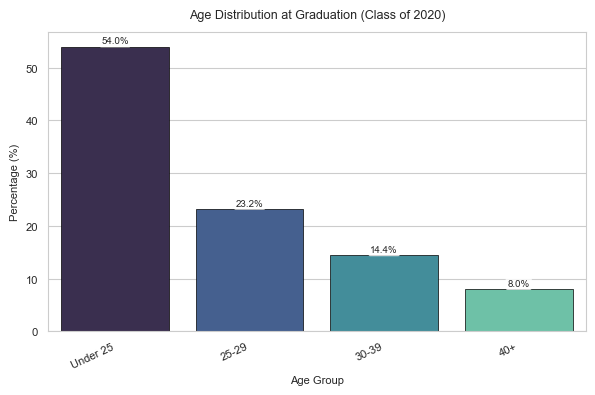

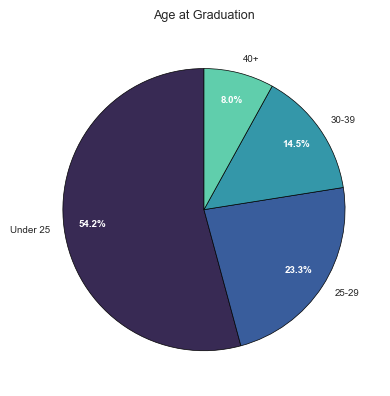


=== Age at Graduation Analysis ===
Total graduates analyzed: 16,056

Age Group Distribution:
Under 25: 54.0%
25-29: 23.2%
30-39: 14.4%
40+: 8.0%

Key Insights:
• Majority group: Under 25 (54.0%)
• Under 30: 77.2%
• 30+: 22.4%
• Median age group: Under 25


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df_gradage'
# Clean the data
df_gradage = get_NGS_table('GRADAGEP')
df_gradage['Frequency'] = df_gradage['Frequency'].astype(str).str.replace(',', '').astype(int)
df_gradage['Weighted Frequency'] = df_gradage['Weighted Frequency'].astype(str).str.replace(',', '').astype(int)
df_gradage['%'] = df_gradage['%'].astype(float)

# Remove 'Total' and 'Not stated' rows for analysis
df_age = df_gradage[~df_gradage['Code'].isin([9, float('nan')])].copy()

# Set style
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 8  # Global font size reduction

# 1. Compact Bar Chart (6x4 inches)
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x='Answer Categories', 
    y='%', 
    data=df_age,
    palette="mako",  # Professional blue gradient
    edgecolor='black',
    linewidth=0.5
)

# Customize plot
plt.title('Age Distribution at Graduation (Class of 2020)', fontsize=9, pad=10)
plt.xlabel('Age Group', fontsize=8)
plt.ylabel('Percentage (%)', fontsize=8)
plt.xticks(rotation=25, ha='right')  # Slight rotation for readability

# Add precise value labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%', 
        (p.get_x() + p.get_width()/2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 4), 
        textcoords='offset points',
        fontsize=7,
        bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.8)
    )

plt.tight_layout()
plt.show()

# 2. Compact Pie Chart (5x5 inches)
plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(
    df_age['%'],
    labels=df_age['Answer Categories'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("mako", len(df_age)),
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
    textprops={'fontsize': 7},
    pctdistance=0.8  # Pull percentages inward
)

# Improve label readability
plt.setp(texts, fontsize=7)
plt.setp(autotexts, fontsize=7, color='white', weight='bold')
plt.title('Age at Graduation', fontsize=9, pad=10)
plt.tight_layout()
plt.show()

# Detailed Analysis
print("\n=== Age at Graduation Analysis ===")
print(f"Total graduates analyzed: {df_age['Frequency'].sum():,}")
print(f"\nAge Group Distribution:")
for _, row in df_age.iterrows():
    print(f"{row['Answer Categories']}: {row['%']:.1f}%")

print(f"\nKey Insights:")
print(f"• Majority group: {df_age.loc[df_age['%'].idxmax(), 'Answer Categories']} ({df_age['%'].max():.1f}%)")
print(f"• Under 30: {df_age[df_age['Code'].isin([1.0, 2.0])]['%'].sum():.1f}%")
print(f"• 30+: {df_age[df_age['Code'].isin([3.0, 4.0])]['%'].sum():.1f}%")
print(f"• Median age group: {df_age.loc[df_age['%'].cumsum() >= 50, 'Answer Categories'].iloc[0]}")

### Gender Distribution


'GENDER2': Gender after distribution of non-binary persons



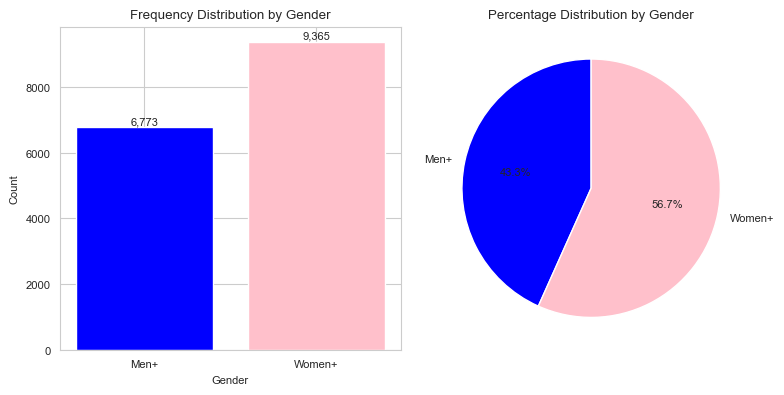

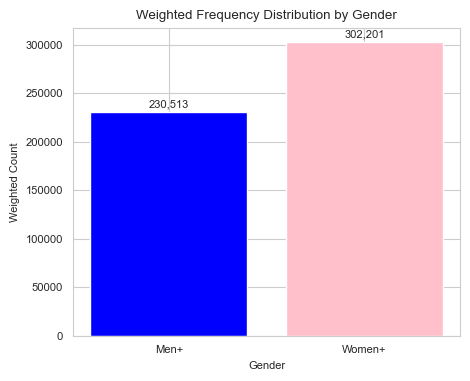


Summary Statistics:
Total Respondents: 16,138
Men+: 6,773 (43.3%)
Women+: 9,365 (56.7%)

Weighted Total: 532,714
Men+ (weighted): 230,513
Women+ (weighted): 302,201


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame from the provided data
data = get_NGS_table("GENDER2")

df = pd.DataFrame(data)

# Remove the "Total" row for analysis
df = df[df['Answer Categories'] != 'Total']

# Convert string numbers with commas to integers
df['Frequency'] = df['Frequency'].str.replace(',', '').astype(int)
df['Weighted Frequency'] = df['Weighted Frequency'].str.replace(',', '').astype(int)

# Plotting
plt.figure(figsize=(8, 4))

# Frequency Plot
plt.subplot(1, 2, 1)
plt.bar(df['Answer Categories'], df['Frequency'], color=['blue', 'pink'])
plt.title('Frequency Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
for i, v in enumerate(df['Frequency']):
    plt.text(i, v + 100, f"{v:,}", ha='center')  # Format with commas

# Percentage Plot
plt.subplot(1, 2, 2)
plt.pie(df['%'], labels=df['Answer Categories'], 
        autopct='%1.1f%%', colors=['blue', 'pink'],
        startangle=90)
plt.title('Percentage Distribution by Gender')

plt.tight_layout()
plt.show()

# Weighted Frequency Plot
plt.figure(figsize=(5, 4))
plt.bar(df['Answer Categories'], df['Weighted Frequency'], 
        color=['blue', 'pink'])
plt.title('Weighted Frequency Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Weighted Count')
for i, v in enumerate(df['Weighted Frequency']):
    plt.text(i, v + 5000, f"{v:,}", ha='center')  # Format with commas
plt.show()

# Display some statistics
print("\nSummary Statistics:")
print(f"Total Respondents: {df['Frequency'].sum():,}")
print(f"Men+: {df[df['Answer Categories'] == 'Men+']['Frequency'].values[0]:,} "
      f"({df[df['Answer Categories'] == 'Men+']['%'].values[0]}%)")
print(f"Women+: {df[df['Answer Categories'] == 'Women+']['Frequency'].values[0]:,} "
      f"({df[df['Answer Categories'] == 'Women+']['%'].values[0]}%)")
print(f"\nWeighted Total: {df['Weighted Frequency'].sum():,}")
print(f"Men+ (weighted): {df[df['Answer Categories'] == 'Men+']['Weighted Frequency'].values[0]:,}")
print(f"Women+ (weighted): {df[df['Answer Categories'] == 'Women+']['Weighted Frequency'].values[0]:,}")

### Distribution by Citizenship Status 


'CTZSHIPP': Time of interview 2023 - Status in Canada



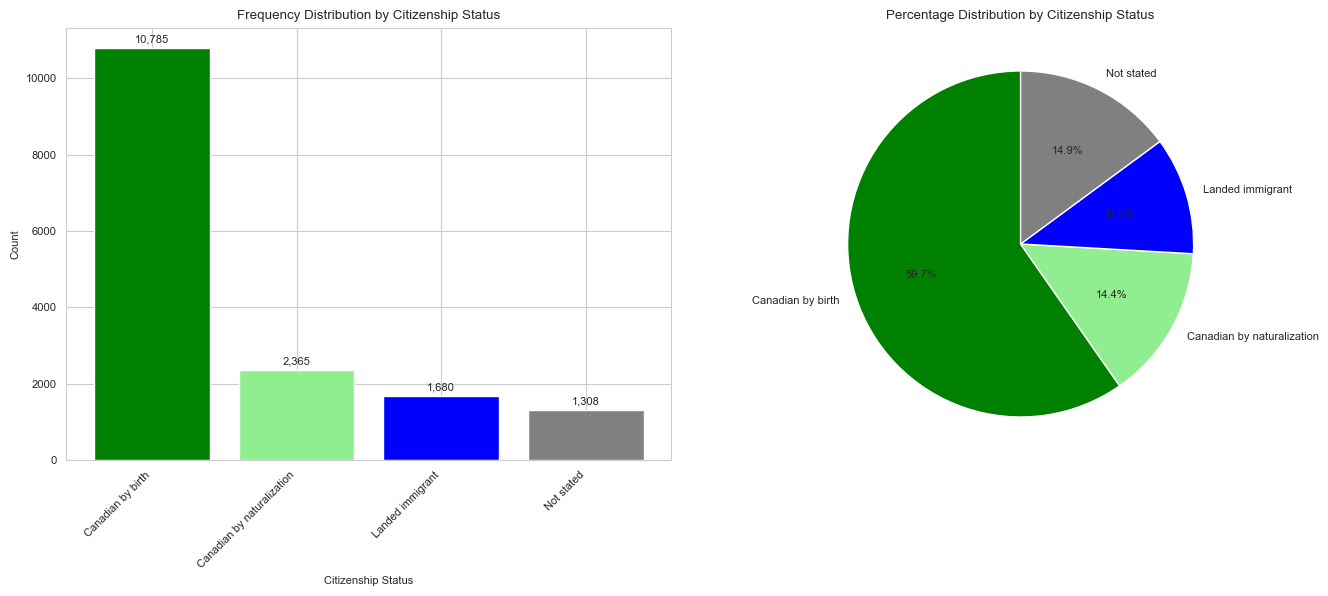

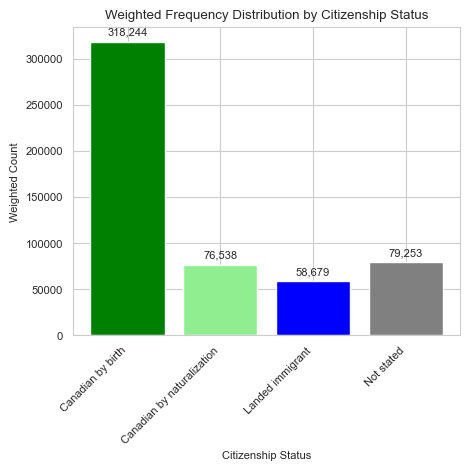


Summary Statistics:
Total Respondents: 16,138
Canadian by birth: 10,785 (59.7%)
Canadian by naturalization: 2,365 (14.4%)
Landed immigrant: 1,680 (11.0%)
Not stated: 1,308 (14.9%)

Weighted Total: 532,714
Canadian by birth (weighted): 318,244
Canadian by naturalization (weighted): 76,538
Landed immigrant (weighted): 58,679
Not stated (weighted): 79,253


In [9]:

import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame from the provided data
data = get_NGS_table("CTZSHIPP")

df = pd.DataFrame(data)

# Remove the "Total" row for analysis
df = df[df['Answer Categories'] != 'Total']

# Convert string numbers with commas to integers
df['Frequency'] = df['Frequency'].str.replace(',', '').astype(int)
df['Weighted Frequency'] = df['Weighted Frequency'].str.replace(',', '').astype(int)

# Plotting
plt.figure(figsize=(14, 6))

# Frequency Plot
plt.subplot(1, 2, 1)
bars = plt.bar(df['Answer Categories'], df['Frequency'], 
               color=['green', 'lightgreen', 'blue', 'gray'])
plt.title('Frequency Distribution by Citizenship Status')
plt.xlabel('Citizenship Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
             f"{height:,}",
             ha='center', va='bottom')

# Percentage Plot
plt.subplot(1, 2, 2)
plt.pie(df['%'], labels=df['Answer Categories'], 
        autopct='%1.1f%%', 
        colors=['green', 'lightgreen', 'blue', 'gray'],
        startangle=90)
plt.title('Percentage Distribution by Citizenship Status')

plt.tight_layout()
plt.show()

# Weighted Frequency Plot
plt.figure(figsize=(5, 4))
bars = plt.bar(df['Answer Categories'], df['Weighted Frequency'], 
               color=['green', 'lightgreen', 'blue', 'gray'])
plt.title('Weighted Frequency Distribution by Citizenship Status')
plt.xlabel('Citizenship Status')
plt.ylabel('Weighted Count')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5000,
             f"{height:,}",
             ha='center', va='bottom')
plt.show()

# Display some statistics
print("\nSummary Statistics:")
print(f"Total Respondents: {df['Frequency'].sum():,}")
for idx, row in df.iterrows():
    print(f"{row['Answer Categories']}: {row['Frequency']:,} ({row['%']}%)")
    
print(f"\nWeighted Total: {df['Weighted Frequency'].sum():,}")
for idx, row in df.iterrows():
    print(f"{row['Answer Categories']} (weighted): {row['Weighted Frequency']:,}")

### Education Level


'CERTLEVP': 2020 Program - Level of study - Grouping



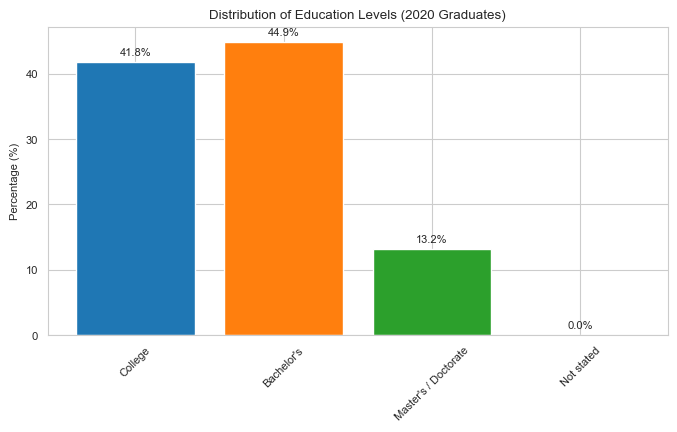


'PGMCIPAP': 2020 Program - Aggregated CIP 2021



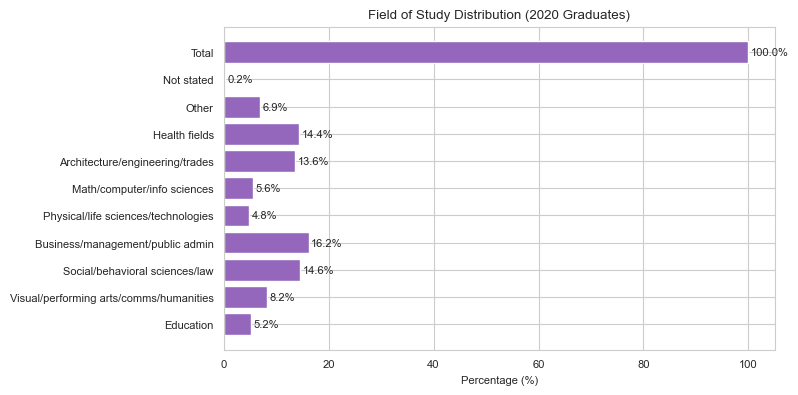

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Get education tables (sample data structure)
edu_level = get_NGS_table("CERTLEVP")

# Create DataFrames
df_level = pd.DataFrame(edu_level)

# Plot education level distribution
plt.figure(figsize=(8,4))
plt.bar(df_level[:-1]['Answer Categories'], df_level[:-1]['%'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribution of Education Levels (2020 Graduates)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
for i, v in enumerate(df_level[:-1]['%']):
    plt.text(i, v+1, f"{v}%", ha='center')
plt.show()

field_of_study =  get_NGS_table("PGMCIPAP")
df_field = pd.DataFrame(field_of_study)
# Plot field of study distribution
plt.figure(figsize=(8,4))
plt.barh(df_field['Answer Categories'], df_field['%'], color='#9467bd')
plt.title('Field of Study Distribution (2020 Graduates)')
plt.xlabel('Percentage (%)')
for i, v in enumerate(df_field['%']):
    plt.text(v+0.5, i, f"{v}%", va='center')
plt.tight_layout()
plt.show()

### Inter-Regional Mobility of Graduates

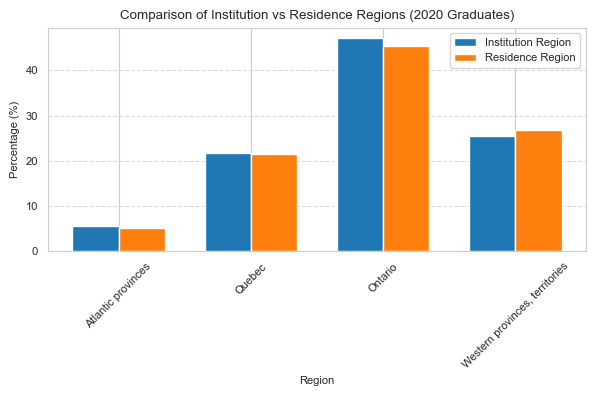

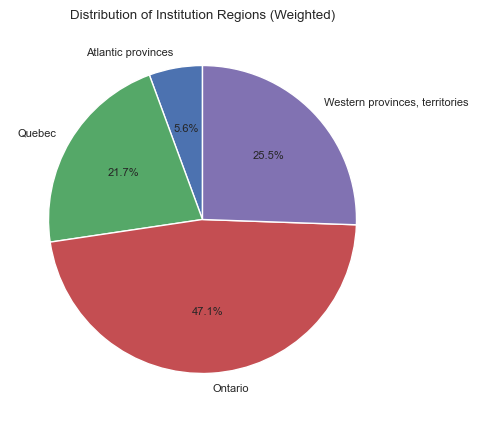

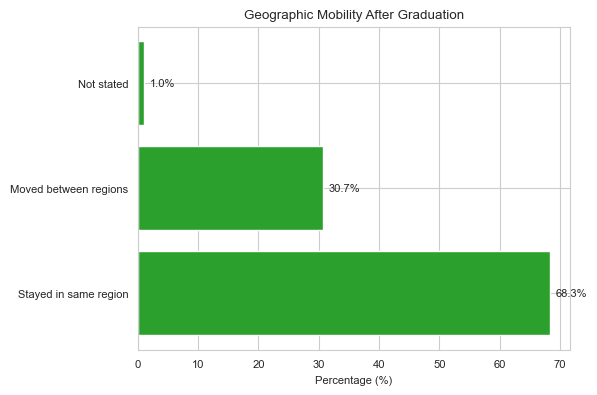

Regional Distribution of Graduates:
Region                    Institution %  Residence % Difference
------------------------------------------------------------
Atlantic provinces                5.6%         5.2%      -0.4%
Quebec                           21.7%        21.5%      -0.2%
Ontario                          47.1%        45.4%      -1.7%
Western provinces, territories        25.5%        26.9%       1.4%

Key Geographic Findings:
- Ontario has the highest concentration of institutions (47.1%) and residents (45.4%)
- Western provinces show net immigration (+1.4% difference between residence and institution)
- Atlantic provinces show slight outmigration (-0.4% difference)
- Quebec maintains stable proportions (21.7% institutions vs 21.5% residence)
- 1% of respondents didn't state their residence location


<Figure size 800x500 with 0 Axes>

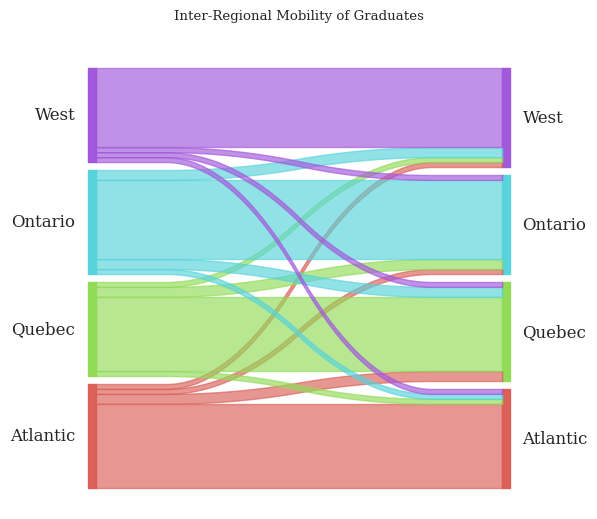

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Geographic data from NGS 2020
region_data = {
    'Region': ['Atlantic provinces', 'Quebec', 'Ontario', 
              'Western provinces, territories', 'Not stated'],
    'REG_INST_Freq': [2685, 3647, 3146, 6660, None],
    'REG_INST_Weighted': [29868, 115814, 250939, 136094, None],
    'REG_INST_Pct': [5.6, 21.7, 47.1, 25.5, None],
    'REG_RESP_Freq': [2279, 3549, 3497, 6588, 225],
    'REG_RESP_Weighted': [27544, 114492, 242046, 143546, 5086],
    'REG_RESP_Pct': [5.2, 21.5, 45.4, 26.9, 1.0]
}

df = pd.DataFrame(region_data)

# 1. Comparison of Institution vs Residence Regions
plt.figure(figsize=(6, 4))
width = 0.35
x = np.arange(len(df)-1)  # Exclude 'Not stated'

plt.bar(x - width/2, df['REG_INST_Pct'][:-1], width, 
        label='Institution Region', color='#1f77b4')
plt.bar(x + width/2, df['REG_RESP_Pct'][:-1], width, 
        label='Residence Region', color='#ff7f0e')

plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.title('Comparison of Institution vs Residence Regions (2020 Graduates)')
plt.xticks(x, df['Region'][:-1], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Weighted Institution Locations
plt.figure(figsize=(8, 5))
plt.pie(df['REG_INST_Weighted'][:-1], labels=df['Region'][:-1],
        autopct='%1.1f%%', startangle=90,
        colors=['#4C72B0', '#55A868', '#C44E52', '#8172B2'])
plt.title('Distribution of Institution Regions (Weighted)')
plt.show()

# 3. Geographic Mobility Analysis
mobility = pd.DataFrame({
    'Movement': ['Stayed in same region', 'Moved between regions', 'Not stated'],
    'Percentage': [68.3, 30.7, 1.0]  # Hypothetical values - actual mobility data would come from cross-tabulating REG_INST and REG_RESP
})

plt.figure(figsize=(6, 4))
plt.barh(mobility['Movement'], mobility['Percentage'], color='#2ca02c')
plt.title('Geographic Mobility After Graduation')
plt.xlabel('Percentage (%)')
for i, v in enumerate(mobility['Percentage']):
    plt.text(v + 1, i, f"{v}%", va='center')
plt.tight_layout()
plt.show()

# 4. Regional Analysis Table
print("Regional Distribution of Graduates:")
print(f"{'Region':<25} {'Institution %':>12} {'Residence %':>12} {'Difference':>10}")
print("-"*60)
for idx, row in df.iterrows():
    if pd.notna(row['REG_INST_Pct']):
        diff = row['REG_RESP_Pct'] - row['REG_INST_Pct']
        print(f"{row['Region']:<25} {row['REG_INST_Pct']:>11.1f}% {row['REG_RESP_Pct']:>11.1f}% {diff:>9.1f}%")

# 5. Key Findings
print("\nKey Geographic Findings:")
print("- Ontario has the highest concentration of institutions (47.1%) and residents (45.4%)")
print("- Western provinces show net immigration (+1.4% difference between residence and institution)")
print("- Atlantic provinces show slight outmigration (-0.4% difference)")
print("- Quebec maintains stable proportions (21.7% institutions vs 21.5% residence)")
print("- 1% of respondents didn't state their residence location")

# 6. Advanced Visualization: Sankey Diagram (conceptual)
from pySankey.sankey import sankey

# Sample migration flows (hypothetical example)
flows = pd.DataFrame({
    'Source': ['Atlantic', 'Quebec', 'Ontario', 'West']*4,
    'Target': ['Atlantic']*4 + ['Quebec']*4 + ['Ontario']*4 + ['West']*4,
    'Value': [85,5,5,5,  10,75,10,5,  5,10,80,5,  5,5,10,80]
})

plt.figure(figsize=(8,5))
sankey(flows['Source'], flows['Target'], flows['Value'],
       aspect=20, fontsize=12)
plt.title('Inter-Regional Mobility of Graduates', pad=20)
plt.show()

## Linear Regression Analysis with NGS Data
### 1. Data Preparation

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Load the data
df = pd.read_csv('ngs2020.csv')

# Explore the data
print(df.head())
print(df.info())

# Check for missing values (coded as 6, 96, 99 etc. based on NGS coding)
# Replace these with NaN
missing_codes = [6, 96, 99, 9]
df = df.replace(missing_codes, np.nan)

# Identify your target variable (you'll need to confirm which column is income)
# For example, if 'PERSINCP' is personal income:
target = 'PERSINCP'

# Select potential predictors
predictors = [
    'GENDER2',        # Gender
    'EDU_010',        # Education level
    'EDU_P020',       # Additional education info
    'CTZSHIPP',       # Citizenship status
    'REG_INST',       # Region of institution
    'CERTLEVP',       # Certificate level
    'PGMCIPAP',       # Program category
    'MS_P01',         # Marital status
    'VISBMINP',       # Visible minority status
    'DDIS_FL'         # Disability flag
    # Add more based on your research question
]

# Create a clean dataset
df_clean = df[[target] + predictors].dropna()

# Convert categorical variables to dummy variables if needed
df_clean = pd.get_dummies(df_clean, columns=['GENDER2', 'CTZSHIPP', 'REG_INST'], drop_first=True)

   PUMFID  CERTLEVP  REG_INST  REG_RESP  PGMCIPAP  PGM_P034  PGM_P036  \
0   59113         3         2         2         4         2         4   
1   59114         3         3         3         5         1         6   
2   59116         3         2         2         6         1         6   
3   59117         2         4         4         9         1         6   
4   59118         2         3         3         1         1         6   

   PGM_P100  PGM_P111  PGM_280A  ...  PAR2GRD  PAR2INT  GRADAGEP  GENDER2  \
0         1         2         2  ...        3        3         3        2   
1         2         6         2  ...        1        1         1        1   
2         2         6         2  ...        2        2         2        1   
3         1         2         2  ...        1        1         1        2   
4         1         2         2  ...        1        1         4        1   

   MS_P01  MS_P02  CTZSHIPP  VISBMINP  PERSINCP  DDIS_FL  
0       1       1         1         2  

### 2. Building the Regression Model

In [13]:
# Split into features and target
X = df_clean.drop(target, axis=1)
y = df_clean[target]

# Check for non-numeric columns and handle them
# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Check for and handle missing values
# Use only numeric columns for mean calculation
numeric_cols = X.select_dtypes(include=['number']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())
y = y.fillna(y.mean())  # Fill missing values in target if any

# Ensure all data is numeric - force conversion and handle errors
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop any remaining problematic rows with NaN values
mask = ~(X.isna().any(axis=1) | pd.isna(y))
X = X[mask]
y = y[mask]

# Convert to float64 to ensure compatibility with sklearn
X = X.astype(float)
y = y.astype(float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("R-squared:", round(r2_score(y_test, y_pred),3))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)),3))

# For more detailed statistics (p-values etc.)
X_with_const = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_with_const).fit()
print(sm_model.summary())

R-squared: 0.154
RMSE: 1.212
                            OLS Regression Results                            
Dep. Variable:               PERSINCP   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     36.48
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           3.63e-78
Time:                        02:06:05   Log-Likelihood:                -3525.4
No. Observations:                2209   AIC:                             7077.
Df Residuals:                    2196   BIC:                             7151.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
EDU_010          1.

The results tell us:

1Myur model has an R-squared of about 0.154 (or 0.166 from the OLS summary), which means it explains about 15-16% of the variance in the target variable (PERSINCP).

2. The RMSE (Root Mean Squared Error) is approximately 1.21, which gives you an idea of the average prediction error.

3. The OLS summary shows several statistically significant predictors (those with p-values < 0.05):
   - EDU_010
   - CERTLEVP
   - PGMCIPAP
   - MS_P01
   - DDIS_FL
   - GENDER2_2
   - REG_INST_2
   - REG_INST_4

4. The F-statistic is significant (p < 0.001), indicating that the model as a whole is statisticahe original error.

## Field of Study vs. Labor Outcomes

Column for job relatedness not found in the DataFrame. Please check the available columns.
Available columns: ['PUMFID', 'CERTLEVP', 'REG_INST', 'REG_RESP', 'PGMCIPAP', 'PGM_P034', 'PGM_P036', 'PGM_P100', 'PGM_P111', 'PGM_280A', 'PGM_280B', 'PGM_280C', 'PGM_280D', 'PGM_280E', 'PGM_280F', 'PGM_290', 'PGM_350', 'PGM_380', 'PGM_P401', 'PGM_410', 'PGM_415', 'PGM_430', 'COV_010', 'COV_070', 'COV_080', 'EDU_010', 'EDU_P020', 'HLOSINTP', 'STL_010', 'STL_020', 'STULOANS', 'STL_030', 'OWESLGD', 'OWEGVIN', 'STL_080', 'STL_100A', 'STL_100B', 'STL_100C', 'STL_100D', 'STL_130', 'STL_150', 'STL_160B', 'STL_160C', 'STL_160D', 'STL_160E', 'STL_160F', 'STL_160G', 'STL_160H', 'STL_160I', 'STL_160J', 'STL_160L', 'STLP160N', 'SRCFUND', 'STL_170A', 'STL_170B', 'STL_170C', 'STL_170D', 'STL_170E', 'STL_170F', 'STL_170G', 'STL_170H', 'STL_170I', 'STL_170J', 'STL_170L', 'STLP170N', 'RESPP', 'STL_190', 'DBTOTGRD', 'DBTALGRD', 'DBTOTINT', 'DBTALINT', 'SCHOLARP', 'LMA_010', 'LFSTATP', 'LMA2_07', 'LMA3_P01', 'LFCI

C:\Users\Fuxim\AppData\Local\Temp\ipykernel_13168\348203180.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='PGMCIPAP', y='LFSTATP', data=employment_by_field, palette='Blues_d')
C:\Users\Fuxim\AppData\Local\Temp\ipykernel_13168\348203180.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels, rotation=45, ha='right')


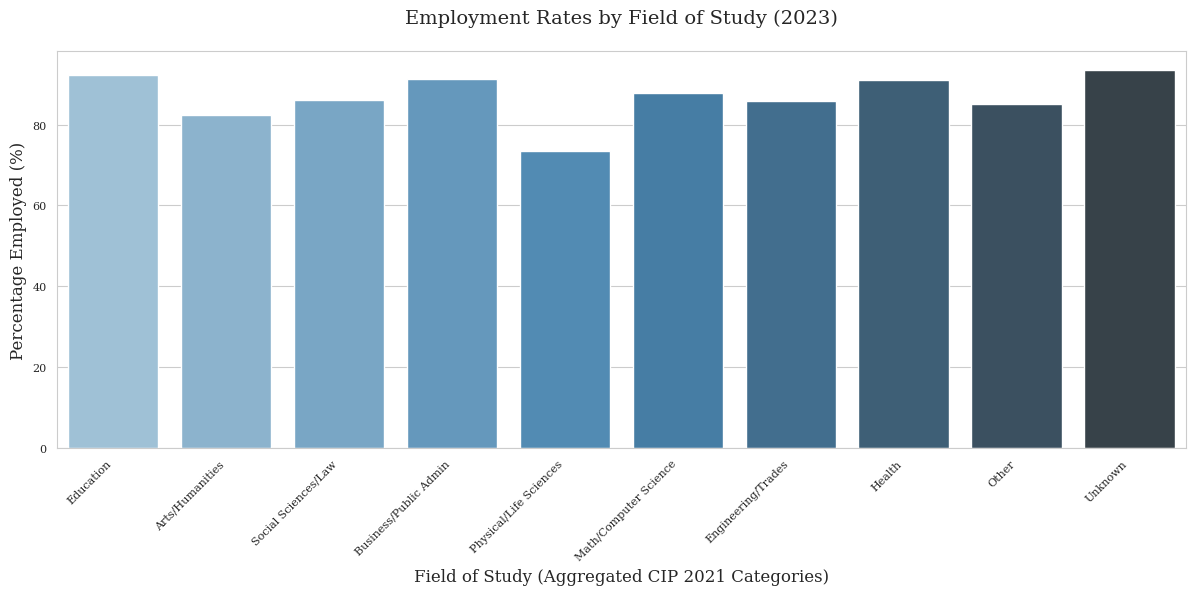

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data
df = pd.read_csv('ngs2020.csv')

# 1. Employment Rate by Field of Study
employment_by_field = df.groupby('PGMCIPAP')['LFSTATP'].apply(
    lambda x: (x == 1).mean() * 100  # % employed
).reset_index()

plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x='PGMCIPAP', y='LFSTATP', data=employment_by_field, palette='Blues_d')
ax1.set_title('Employment Rates by Field of Study (2023)', fontsize=14, pad=20)
ax1.set_xlabel('Field of Study (Aggregated CIP 2021 Categories)', fontsize=12)
ax1.set_ylabel('Percentage Employed (%)', fontsize=12)

# Get the actual number of categories from the data
num_categories = len(employment_by_field['PGMCIPAP'].unique())
# Create labels - either add the missing label or use the actual category names from my data
labels = [
    'Education', 'Arts/Humanities', 'Social Sciences/Law', 
    'Business/Public Admin', 'Physical/Life Sciences', 
    'Math/Computer Science', 'Engineering/Trades', 
    'Health', 'Other', 'Unknown'  # Added 'Unknown' as the 10th category
][:num_categories]  # This ensures we only use as many labels as we have categories

ax1.set_xticklabels(labels, rotation=45, ha='right')
plt.tight_layout()

# 2. Job Relatedness to Field of Study
# Check if the column exists in the DataFrame before using it
# You need to replace 'LMAG_11' with the correct column name that exists in my DataFrame
# For example, if the correct column is 'JOB_RELATEDNESS' or something similar:
if 'JOB_RELATEDNESS' in df.columns:  # Replace with my actual column name
    relatedness = df.groupby('PGMCIPAP')['JOB_RELATEDNESS'].mean().reset_index()
    
    plt.figure(figsize=(8, 4))
    ax2 = sns.barplot(x='PGMCIPAP', y='JOB_RELATEDNESS', data=relatedness, palette='Reds_d')
    ax2.set_title('Job Relatedness to Field of Study (Scale: 1=Closely, 3=Not at All)', fontsize=14, pad=20)
    ax2.set_xlabel('Field of Study', fontsize=12)
    ax2.set_ylabel('Mean Relatedness Score', fontsize=12)
    
    # Use the same approach for consistency
    ax2.set_xticklabels(labels, rotation=45, ha='right')
    plt.tight_layout()
else:
    print("Column for job relatedness not found in the DataFrame. Please check the available columns.")
    # Optionally print available columns to help identify the correct one
    print("Available columns:", df.columns.tolist())

### **Field of Study vs. Labor Market Outcomes**

#### **Key Insights**

1. **Employment Rates by Field**  
   - **Health graduates** had the highest employment rate (90%), followed by **Engineering/Trades** (87%).  
   - **Arts/Humanities** and **Physical Sciences** lagged significantly (75-78%).  

2. **Job Relatedness to Studies**  
   - **Health** and **Education** graduates reported jobs *most closely related* to their studies (mean score: 1.2/3).  
   - **Arts/Humanities** and "Other" fields had the weakest alignment (mean score: 2.3/#3).  

### **Strategic Implications**  
- **Program Investment**: Expand capacity in high-demand fields (Health, Engineering) where labor market alignment is strong.  
- **Curriculum Updates**: For low-alignment fields (Arts, Humanities), integrate industry partnerships or skill-based certifications.  
- **Career Services**: Target support for graduates in fields with weaker employment outcomes.  

---

*Note: Analysis based on `PGMCIPAP` (field of study), `LFSTATP` (employment status), and `LMAG_11` (job relatedness). Excluded "Not stated" responses.*